**D1DAE: Análise Estatística para Ciência de Dados** <br/>
IFSP Campinas

Prof. Dr. Samuel Martins <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

#### Custom CSS

In [1]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
#    font-size: var(--jp-content-font-size1) !important;
}


.dashed-box tr {
    background-color: white !important;
}
</style>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Simple Linear Regression

## 📊 1. Exploring the Data


Dummy dataset created to study simple linear regression. <br/>
https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression
    
The file considered in this notebook corresponds to such a dataset only with the shuffled lines.

### 1.1. Importing the Dataset

In [4]:
df = pd.read_csv('datasets/experience_salary_dataset.csv')

In [5]:
df

,YearsExperience,Salary
0,8.7,109431.0
1,5.3,83088.0
2,9.0,105582.0
3,6.0,93940.0
4,9.6,112635.0
5,2.9,56642.0
6,4.0,56957.0
7,3.9,63218.0
8,3.2,54445.0
9,3.2,64445.0


In [11]:
df.shape

(30, 2)

In [13]:
df.columns = ['Experience', 'Salary']
df

,Experience,Salary
0,8.7,109431.0
1,5.3,83088.0
2,9.0,105582.0
3,6.0,93940.0
4,9.6,112635.0
5,2.9,56642.0
6,4.0,56957.0
7,3.9,63218.0
8,3.2,54445.0
9,3.2,64445.0


### 1.2. Basic Information about the Dataset

In [14]:
print(f'This dataset has {df.shape[0]} observations/samples/rows and {df.shape[1]} attributes/features/colunas')

This dataset has 30 observations/samples/rows and 2 attributes/features/colunas


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  30 non-null     float64
 1   Salary      30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### 1.3. Descriptive Statistics

In [16]:
df.describe()

,Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:title={'center':'Boxplot - Salary ($)'}, ylabel='Salary'>

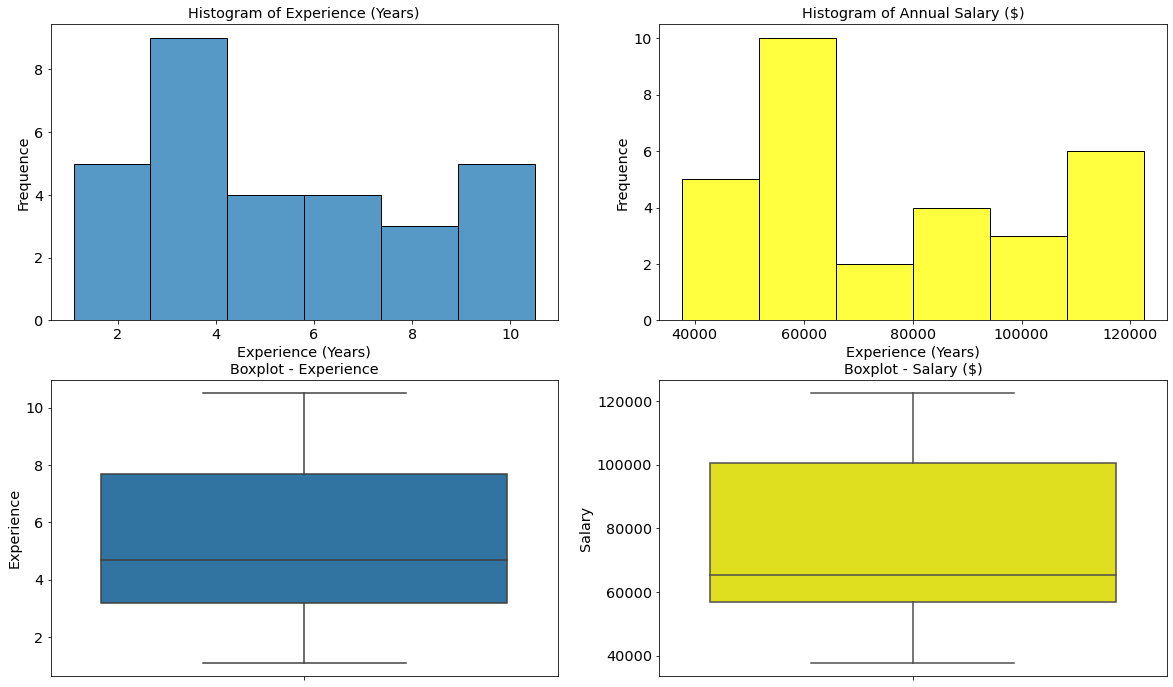

In [17]:
fig = plt.figure(figsize=(20, 12))

axis_1 = fig.add_subplot(2, 2, 1)
axis_1.set_title('Histogram of Experience (Years)')
axis_1.set_xlabel('Experience (Years)')
axis_1.set_ylabel('Frequence')
sns.histplot(data=df, x='Experience', ax=axis_1)

axis_2 = fig.add_subplot(2, 2, 2)
axis_2.set_title('Histogram of Annual Salary ($)')
axis_2.set_xlabel('Experience (Years)')
axis_2.set_ylabel('Frequence')
sns.histplot(data=df, x='Salary', ax=axis_2, color="yellow")

axis_3 = fig.add_subplot(2, 2, 3)
axis_3.set_title('Boxplot - Experience')
axis_3.set_ylabel('Experience (Years)')
sns.boxplot(data=df, y='Experience', orient='v', ax=axis_3)

axis_4 = fig.add_subplot(2, 2, 4)
axis_4.set_title('Boxplot - Salary ($)')
axis_4.set_ylabel('Salary (Annual)')
sns.boxplot(data=df, y='Salary', orient='v', color="yellow", ax=axis_4)

### 1.4 Correlation Matrix

The **correlation coefficient** measures the _linear association_ between two variables. Its value ranges from **_-1_** (perfect negative association) and **_+1_** (perfect positive association).
<img src="imgs/correlation_coefficient.png" width="70%" />

Source: https://dataz4s.com/statistics/correlation-coefficient/

<AxesSubplot:xlabel='Experience', ylabel='Salary'>

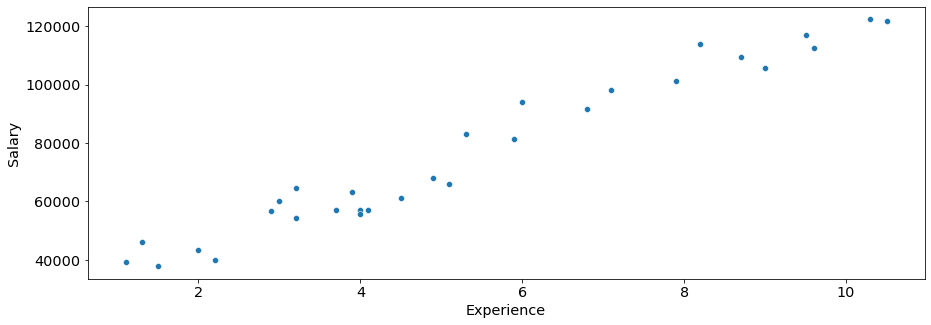

In [18]:
sns.scatterplot(data=df, x='Experience', y='Salary')

In [19]:
df.corr()

,Experience,Salary
Experience,1.000000,0.978242
Salary,0.978242,1.000000


## 2. Dependent Variable (y) vs Independent Variables

### `pairplot`

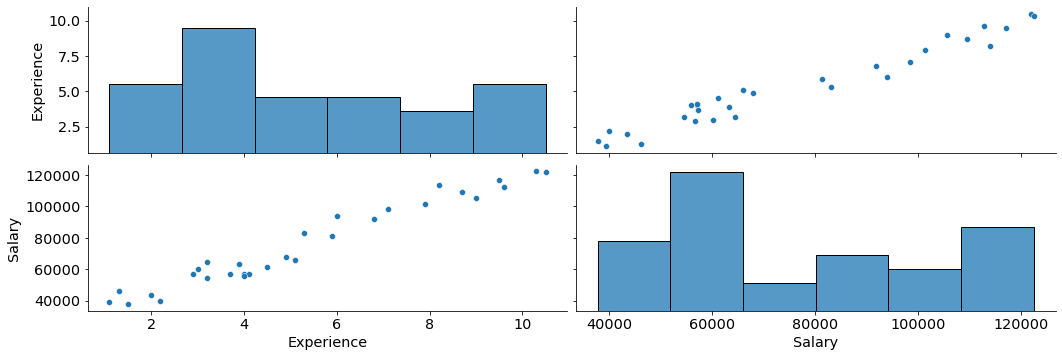

In [20]:
sns.pairplot(df, aspect=3)

### `jointplot`

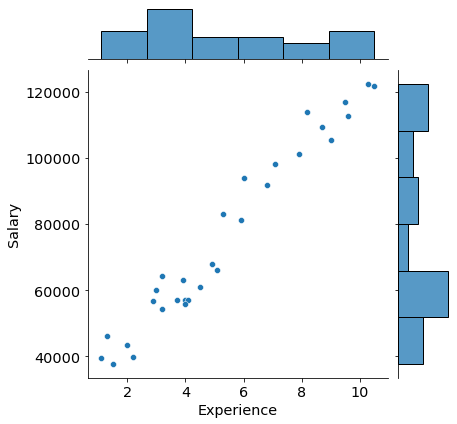

In [21]:
sns.jointplot(data=df, x='Experience', y='Salary')

### `jointplot` with the estimated regression line

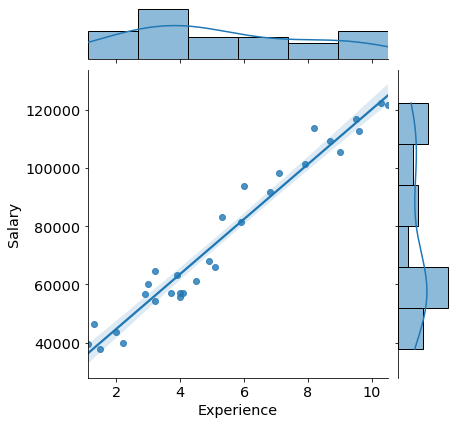

In [22]:
sns.jointplot(data=df, x='Experience', y='Salary', kind='reg')

### `lmplot`
Plots the regression line between two variables together with their respective dispersions.

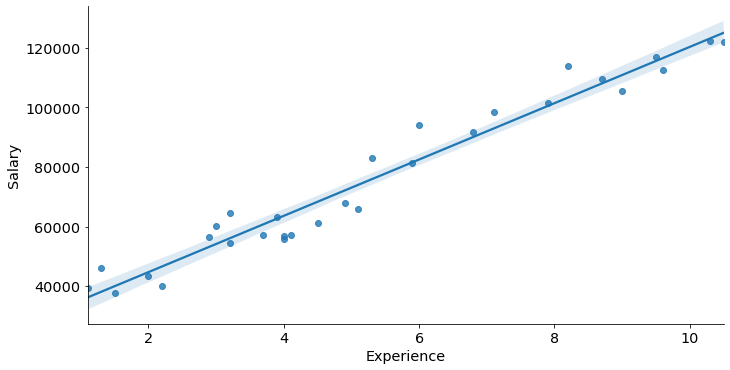

In [23]:
sns.lmplot(data=df, x='Experience', y='Salary', aspect=2)

## 🤖 3. Estimating a Linear Regressor

### 3.1. Extracting the independent and dependent variables

#### Creating a DataFrame to store the independent/explanatory variables: Feature Matrix (X)
NB: we could use a numpy array instead.

#### Creating a Series to store the dependent variable (y)

### 3.2 Splitting the dataset into Training Set and Test Set
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#### Checking training and test set sizes

### 3.3. Training the Simple Linear Regression Model with the Training Set
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

A partir do conjunto de treinamento estabelecido, nossa reta é então: <br/>
**h(x) = 24568.367141463837 + 9694.4074634 * x**

The predicted annual salary of an **inexperienced (zero years of experience)** employee is \\$24,568.36 (intercept $ \theta_0 $).

**For each additional year of experience**, the employee's annual salary increases by \\$9,694.4 (slope of the line - $ \theta_1 $).

## 3.4 Coefficient of determination (R²) of the linear model estimated with the Training Set

The ***coefficient of determination (R²)*** measures the _proportion of total variability_ of the _$y$-value_ (**dependent variable**) that is accounted for by _another variable_ (**independent variable $x$**).

In our case, it tells _"how much of the variation in the **salary ($y$)** can be explained by the **employee's experience ($x$)**."_

In simple words, the ***coefficient of determination (R²)*** tells you _how well the regression line fits the training data_. <br/>
It is a value (generally) between 0 and 1.

Eg **R² = 0.8234** means that the _linear model_ explains 82.34% of the _variance_ of the **dependent variable** from the regressors (**independent variables**) included in that _linear model_.

Broadly speaking:

| **Coefficient of determination (R²)** | **Interpretation**                            |
|---------------------------------------|-----------------------------------------------|
| 0                                     | The model **does not** predict the outcome.   |
| Between 0 and 1                       | The model **partially** predicts the outcome. |
| 1                                     | The model **perfectly** predicts the outcome. |

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^{m}(y^{(i)}-\bar{y})^2}$$

<br/>

<table align="left" class='dashed-box'>
<tr>
    <td>💡</td>
    <td>In general, an <b>R² value</b> of <b><i>0.7 or higher</i></b> is often considered a <i>strong relationship</i> between <i>two variables</i>.</td>
</tr>
</table>
    
<table align="left" class='dashed-box'>
<tr>
    <td>⚠️</td>
    <td><b>R²</b> is typically used <i>only</i> for the <b><i>training data</i></b> since the <i>regression model</i> was trained from it.<br/> Therefore, <b>R²</b> value obtained on the <b><i>training data</i></b> <i>may not</i> be an accurate reflection of how well the model will perform on <b><i>unseen data (testing data)</i></b>.</td>
</tr>
</table>

<table align="left" class='dashed-box'>
<tr>
    <td>💡</td>
    <td>To evaluate <b><i>unseen data (testing data)</i></b>, it is recommended to other metrics such as the <i>Root Mean Squared Error (RMSE)</i> or the <i>Mean Absolute Error (MAE)</i>.</td>
</tr>
</table>

#### Correlation Coefficient vs Coefficient of Determination

The **Correlation Coefficient** is the _squared root_ of the ***Coefficient of Determination (R²)***. <br/>
In other words:
- the **Correlation Coefficient** tells us about the _strength_ and _direction_ of the ***linear relationship*** between _two variables_
- ***R²*** tells us about the _proportion of the variation_ in the ***dependent variable*** that is _explained_ by the ***independent variable(s)*** in a _regression model_.

In [ ]:
print(f'R² = {}')

## 4. Predicting Salaries for Test Samples

### 4.1. Prediction

The **residuals** inform how far the predictions are from the linear model.

In [ ]:
results.describe()

### 4.2. Visualizing the samples with the Linear Models

In [ ]:
regression_line_x = X['Experience']
regression_line_y = regressor.predict(X)
regression_line_y

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

regression_line_x = X['Experience']
regression_line_y = regressor.predict(X)

sns.scatterplot(x=X_train['Experience'], y=y_train, ax=axs[0])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[0])
axs[0].set_title('Annual Salary vs Years of Experience (Training Set)')
axs[0].set_xlabel('Experience (Years)')
axs[0].set_ylabel('Salary ($)')

sns.scatterplot(x=X_test['Experience'], y=y_test, color="green", marker='*', s=200, ax=axs[1])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[1])
axs[1].set_title('Annual Salary vs Years of Experience (Testing Set)')
axs[1].set_xlabel('Experience (Years)')
axs[1].set_ylabel('Salary ($)')

display()

In [ ]:
X_labeled = X.copy()
X_labeled['Label'] = 'Train'
X_labeled
X_labeled.loc[X_test.index, 'Label'] = 'Test'
X_labeled

In [ ]:
sns.scatterplot(data=X_labeled, x='Experience', y=y, hue='Label', style='Label', s=100)
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")
plt.title('Annual Salary vs Years of Experience (Training and Testing Set)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')

## 5. Computing Evaluation Metrics

How much do the predictions obtained differ from the actual data?

### Mean Absolute Error (MAE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

$$ MAE = \frac{1}{m}\sum_{i=1}^{m}|y^{(i)} - \hat{y}^{(i)}| $$

### Mean Squared Error (MSE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)} - \hat{y}^{(i)})^2 $$

Since the **errors** are squared before computing the _mean_, MSE weights **large errors** more than the MAE.

## Root Mean Squared Error (RMSE)
Square root of the MSE. <br/>
This is the metric commonly used to compare regression models.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

# Exercise

Consider the dataset below that contains **heights** (in inches/inches) and **weights** (in pounds/lbs) of fake people. <br/>
https://www.kaggle.com/mustafaali96/weight-height

Perform the following tasks:
- Split the dataset into 80% for training and 20% for testing
- Compute the correlation between the training set variables
- Train a regression model considerint **height** as the independent variable and **weight** as the dependent one
   + Compute the model determination coefficient
   + Plot a scatterplot of the two variables containing the regression model (line)
- Predict the test set
   + Plot a scatterplot of the two variables containing the regression model (line)
   + Compute error metrics for regression